In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import random

from collections import Counter
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data loading

In [5]:
data = pd.read_csv('/content/drive/MyDrive/周一周四代码表格/olist_geolocation_dataset.csv')

## Data analysis

#### Customer distribution heat map

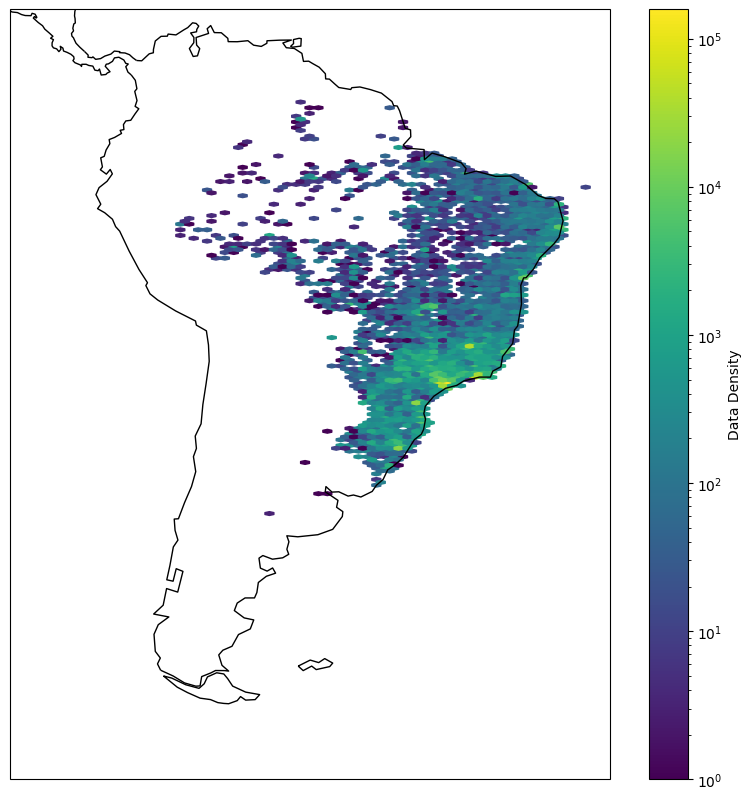

In [6]:
# 假设data是一个DataFrame，有两列分别存储经度和纬度
geolocation_lng = data['geolocation_lng'].values
geolocation_lat = data['geolocation_lat'].values

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 使用hexbin绘制热力图，调整bins大小以适应数据密度
hb = ax.hexbin(geolocation_lng, geolocation_lat, gridsize=250, bins='log', cmap='viridis', mincnt=1, alpha=1, transform=ccrs.PlateCarree())

# 添加色标条
cbar = fig.colorbar(hb, ax=ax, label='Data Density')

# 其他地图元素保持不变
ax.set_extent([-90, -30, -60, 12])
ax.coastlines()

# 显示图形
plt.show()

## KMeans Clustering

#### Data preprocessing

In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# 從dataframe中提取經度和緯度的列
lng = data['geolocation_lng']
lat = data['geolocation_lat']

# 將經度和緯度轉換為numpy數組
X = np.array(list(zip(lng, lat)))

# 使用KMeans算法進行聚類，假設要聚成k個類別
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# 打印聚類的中心點
print(kmeans.cluster_centers_)

# 打印每個數據點的聚類結果
print(kmeans.labels_)


[[-51.72472149 -25.3723201 ]
 [-45.69775423 -22.08854504]
 [-40.91039191  -8.17609797]]
[1 1 1 ... 0 0 0]


Since the amount of data is too large, 1,000 coordinates are randomly selected 100 times for KMeans training, and the k value with the highest frequency is obtained.

In [8]:
X = data[['geolocation_lat','geolocation_lng']]

In [9]:
total_K = []
for i in range(0, 100):
    indices = data.index.tolist()
    random_indices = random.sample(indices, 1000)
    sample_X = X.loc[random_indices]
    sample_X

    # km_inertias, km_scores = [], []
    km_scores = 0

    # clustering criteria
    filtered_data = sample_X
    scaler = StandardScaler()
    model = scaler.fit(filtered_data)
    scaled_data = model.transform(filtered_data)

    for k in range(2, 15):
        km = KMeans(n_clusters=k).fit(scaled_data)
        # km_inertias.append(km.inertia_)
        # km_scores.append(silhouette_score(scaled_data, km.labels_))
        # print(f"Processing K-Means with k = {k}, Inertia = {km.inertia_}, Silhoutte Score = {silhouette_score(scaled_data, km.labels_)}")
        if silhouette_score(scaled_data, km.labels_) > km_scores:
            km_scores = silhouette_score(scaled_data, km.labels_)
            best_k = k
            best_model = km
    print(f"Best K = {best_k}, Best Silhoutte Score = {km_scores}")
    total_K.append(best_k)

Best K = 13, Best Silhoutte Score = 0.6234935889366775
Best K = 2, Best Silhoutte Score = 0.6365564535705721
Best K = 2, Best Silhoutte Score = 0.6280176166935172
Best K = 2, Best Silhoutte Score = 0.6337229347104136
Best K = 2, Best Silhoutte Score = 0.6244084449847424
Best K = 2, Best Silhoutte Score = 0.6365255149803835
Best K = 14, Best Silhoutte Score = 0.630621174119502
Best K = 2, Best Silhoutte Score = 0.6420634252539891
Best K = 2, Best Silhoutte Score = 0.6301687397658666
Best K = 2, Best Silhoutte Score = 0.6285344112422312
Best K = 2, Best Silhoutte Score = 0.6381239643596577
Best K = 2, Best Silhoutte Score = 0.6433853611837361
Best K = 2, Best Silhoutte Score = 0.6291864892005173
Best K = 2, Best Silhoutte Score = 0.6157152124234988
Best K = 2, Best Silhoutte Score = 0.6174427055786156
Best K = 2, Best Silhoutte Score = 0.6320681420260573
Best K = 2, Best Silhoutte Score = 0.6522593818419002
Best K = 3, Best Silhoutte Score = 0.6426205616249344
Best K = 2, Best Silhoutte 

In [10]:
Counter(total_K)#2是最多的

Counter({13: 1, 2: 92, 14: 3, 3: 4})

K=2 is the best

In [11]:
optimal_k = 2

# clustering criteria
filtered_data = X
scaler = StandardScaler()
model = scaler.fit(filtered_data)
scaled_data = model.transform(filtered_data)

km = KMeans(n_clusters=optimal_k).fit(scaled_data)

X['Label'] = km.labels_
X

,geolocation_lat,geolocation_lng,Label
0,-23.545621,-46.639292,1
1,-23.546081,-46.644820,1
2,-23.546129,-46.642951,1
3,-23.544392,-46.639499,1
4,-23.541578,-46.641607,1
...,...,...,...
1000158,-28.068639,-52.010705,1
1000159,-27.877125,-52.224882,1
1000160,-28.071855,-52.014716,1
1000161,-28.388932,-51.846871,1


In [12]:
centers =  X.groupby('Label').mean()
centers

,geolocation_lat,geolocation_lng
Label,,
0,-8.630026,-40.351159
1,-22.809729,-47.176903


#### Distribution map after clustering

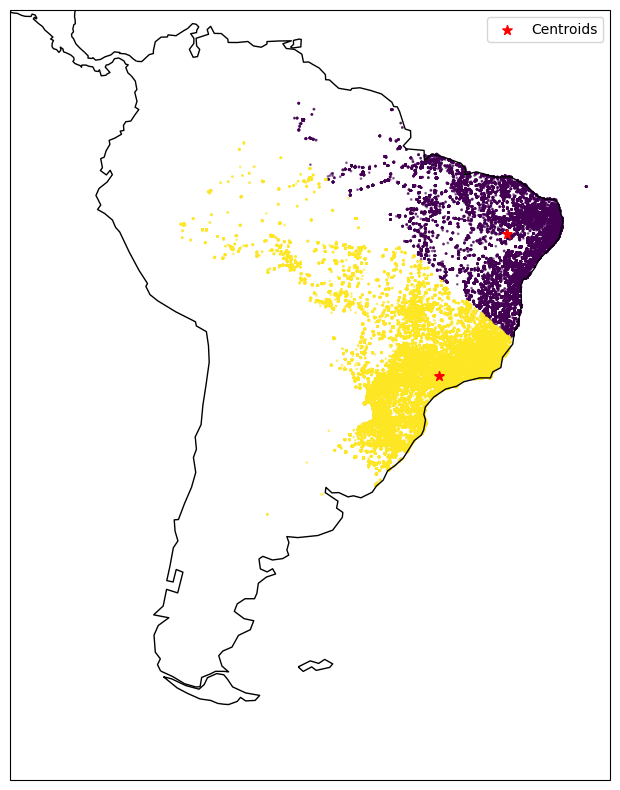

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 使用hexbin绘制热力图，调整bins大小以适应数据密度
hb = ax.scatter(geolocation_lng, geolocation_lat,c=X['Label'],s = 1,alpha=0.5)

ax.scatter(centers['geolocation_lng'],centers['geolocation_lat'] , marker = '*',s=50 ,label = 'Centroids',color='red')
ax.legend()
# 其他地图元素保持不变
ax.set_extent([-90, -30, -60, 12])
ax.coastlines()

# 显示图形
plt.show()

## Clustering based on geolocation_state

In [14]:
len(data['geolocation_state'].unique())

27

#### K = 27

In [15]:
optimal_k = 27
X = data[['geolocation_lat','geolocation_lng']]

# clustering criteria
filtered_data = X
scaler = StandardScaler()
model = scaler.fit(filtered_data)
scaled_data = model.transform(filtered_data)

km = KMeans(n_clusters=optimal_k).fit(scaled_data)

X['Label'] = km.labels_
X

,geolocation_lat,geolocation_lng,Label
0,-23.545621,-46.639292,0
1,-23.546081,-46.644820,0
2,-23.546129,-46.642951,0
3,-23.544392,-46.639499,0
4,-23.541578,-46.641607,0
...,...,...,...
1000158,-28.068639,-52.010705,22
1000159,-27.877125,-52.224882,22
1000160,-28.071855,-52.014716,22
1000161,-28.388932,-51.846871,22


In [16]:
centers =  X.groupby('Label').mean()
centers

,geolocation_lat,geolocation_lng
Label,,
0,-23.440326,-46.621377
1,-4.334127,-38.776082
2,-14.270972,-56.001161
3,-22.703760,-43.244642
4,-27.347438,-48.988236
5,-16.202214,-48.738413
6,-15.099332,-42.928914
7,-1.611945,-48.863831
8,-22.224484,-50.973156


#### Distribution map after clustering

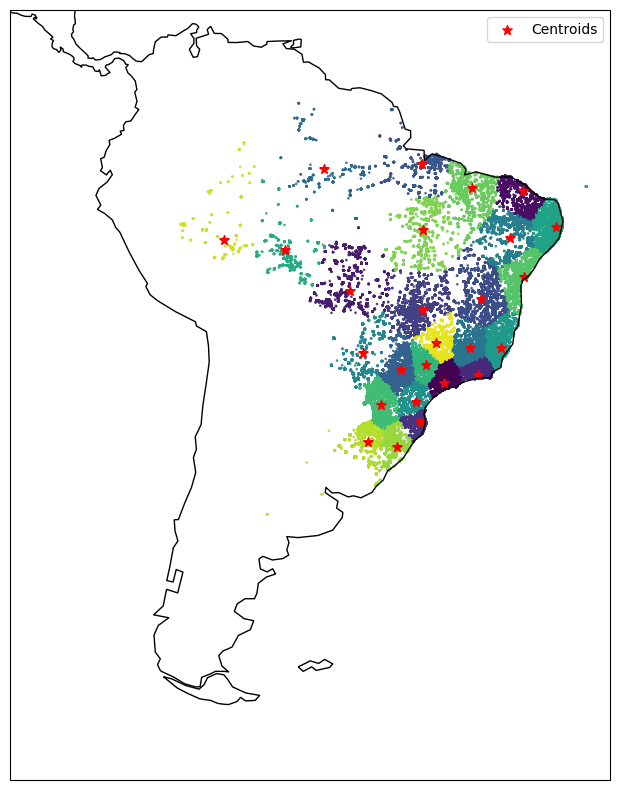

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 使用hexbin绘制热力图，调整bins大小以适应数据密度
hb = ax.scatter(geolocation_lng, geolocation_lat,c=X['Label'],s = 1,alpha=0.75)

ax.scatter(centers['geolocation_lng'],centers['geolocation_lat'] , marker = '*',s=50 ,label = 'Centroids',color='red')
ax.legend()

# 其他地图元素保持不变
ax.set_extent([-90, -30, -60, 12])
ax.coastlines()


# 显示图形
plt.show()

## Commentary and location analysis

#### Data Loading

In [136]:
reviews_data = pd.read_excel('/content/drive/MyDrive/周一周四代码表格/olist_order_reviews_dataset_English.xlsx')
customers_data = pd.read_csv('/content/drive/MyDrive/周一周四代码表格/olist_customers_dataset.csv')
order_data = pd.read_csv('/content/drive/MyDrive/周一周四代码表格/olist_orders_dataset.csv')

#### Choose the words delay to analyze

In [137]:
bad_words = ['delay']

#### Remove punctuation and change it to lower case

In [138]:
#Lowercase and remove punctuation
reviews_data['review_comment_message'] = reviews_data['review_comment_message'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

#### Calculate the number of delays in each comment

In [139]:
bad_words_record = reviews_data[['review_comment_message','order_id']]#新建表格
for j in range(len(reviews_data['review_comment_message'])):
    sentence = str(reviews_data['review_comment_message'][j])#句子循环
    if sentence != 'nan':
        for k in bad_words:#负面词循环
            count = 0#每个负面词的频次
            for i in sentence.split():#句中循环
                if i==k:
                    count += 1
            bad_words_record.loc[j,k] = count

In [140]:
bad_words_record[bad_words_record['delay']==1].head(5)

,review_comment_message,order_id,delay
170,i hope to receive it this week which wouldnt b...,cadd4c5765abf658117f2cc7e2a639c2,1.0
551,despite the delay in issuing the invoice once ...,bf6a2df6b944199274254f8bb0159ec3,1.0
1910,everything is correct except for the delay whi...,cafaa2f3a1466caa4be0de187d9a228a,1.0
1952,delay product not delivered,167d05678f810589a854d30460ae62f0,1.0
2100,i bought the case paid expensive shipping and ...,81d550d68045ea1051617a303020f9c1,1.0


In [186]:
merged_data = pd.merge(bad_words_record, order_data, on='order_id')
merged_data = pd.merge(merged_data,customers_data , on='customer_id')

#### Calculates the unit delay rate in the region

In [187]:
color_mach = pd.merge(pd.DataFrame(merged_data.groupby('customer_state').count()['customer_id']),pd.DataFrame(merged_data[merged_data['delay']==1]['customer_state'].value_counts()),on='customer_state')
color_mach['rate'] = color_mach['count']/color_mach['customer_id']

In [188]:
#sort
ranked_values = color_mach['rate'].rank(ascending=True, method='dense')

ranked_order_series = pd.Series(ranked_values, name='rate_rank')

color_mach['rate_rank'] = ranked_order_series

In [189]:
color_mach.head(5)

,customer_id,count,rate,rate_rank
customer_state,,,,
AL,417,5,0.011990,24.0
AM,149,1,0.006711,16.0
AP,68,1,0.014706,25.0
BA,3398,21,0.006180,13.0
CE,1339,14,0.010456,23.0


In [190]:
merged_data = pd.merge(data,color_mach,left_on='geolocation_state',right_on='customer_state')

In [191]:
merged_data.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,customer_id,count,rate,rate_rank
0,1037,-23.545621,-46.639292,sao paulo,SP,41967,103,0.002454,3.0
1,1046,-23.546081,-46.644820,sao paulo,SP,41967,103,0.002454,3.0
2,1046,-23.546129,-46.642951,sao paulo,SP,41967,103,0.002454,3.0
3,1041,-23.544392,-46.639499,sao paulo,SP,41967,103,0.002454,3.0
4,1035,-23.541578,-46.641607,sao paulo,SP,41967,103,0.002454,3.0


#### Map of delay rates by region

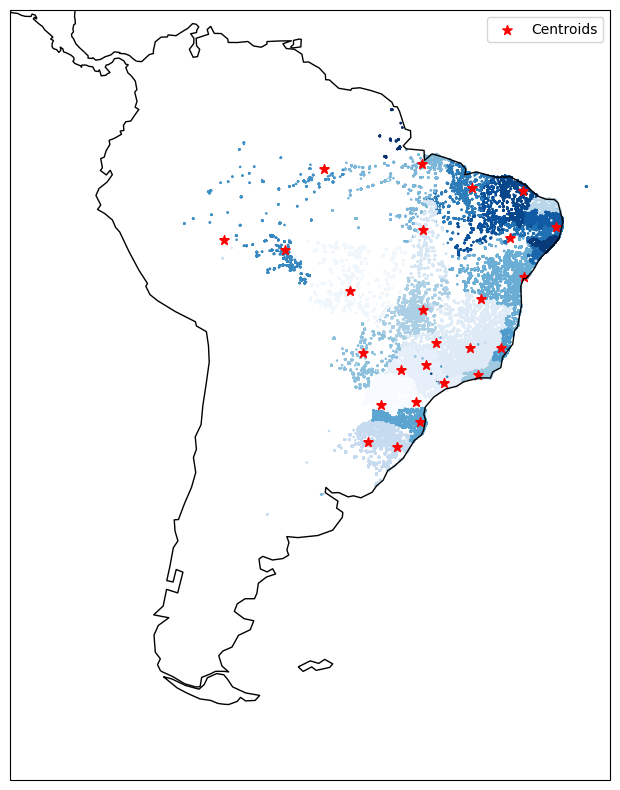

In [192]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 使用hexbin绘制热力图，调整bins大小以适应数据密度
hb = ax.scatter(merged_data['geolocation_lng'], merged_data['geolocation_lat'],c=merged_data['rate_rank'],s = 0.75,alpha=1,cmap='Blues')

ax.scatter(centers['geolocation_lng'],centers['geolocation_lat'] , marker = '*',s=50 ,label = 'Centroids',color='red')
ax.legend()

# 其他地图元素保持不变
ax.set_extent([-90, -30, -60, 12])
ax.coastlines()


# 显示图形
plt.show()